In [63]:
# Data preparation
import pandas as pd
import numpy as np
import math
from datetime import timedelta
from datetime import datetime

In [440]:
# Text cleaning
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
# np.random.seed(2018)
import nltk

In [21]:
# Load message and clean
path = '/Users/wanghan/Projects/MacMic/data/Messaging.csv'
message = pd.read_csv(path)
message = message.dropna()
message = message.reset_index(drop=True)
message = message[['Users User ID', ' CHATting Stylists Stylist ID',
       'CHAT Messages Created Time', 'CHAT Messages Sender',
       'CHAT Messages Message Body']]
message.columns = ['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody']
message['ChatTime'] = pd.to_datetime(message['ChatTime'])
message['StylistID'] = pd.to_numeric(message['StylistID'])
message['UserID'] = pd.to_numeric(message['UserID'])
message.head()

,UserID,StylistID,ChatTime,Sender,ChatBody
0,216703.0,98569.0,2019-06-12 20:21:00,stylist,Sounds good 😊
1,313354.0,281470.0,2019-06-12 20:21:00,customer,Sorry that was ment to say dollars
2,202942.0,156257.0,2019-06-12 20:21:00,stylist,Great - would you like a box for each of the b...
3,313354.0,281470.0,2019-06-12 20:20:00,customer,So let's say one item cost 20 and 15 and if sh...
4,313354.0,281470.0,2019-06-12 20:19:00,stylist,"Yes, you only pay for the items you decide to ..."


In [22]:
transactions = pd.read_csv('/Users/wanghan/Projects/MacMic/data/transactions_1.csv')
transactions.head()

,OrderID,StylistID,UserID,RequestDate,ShipDate,SettleDate,OrderTimes
0,6121,3195.0,35,2016-04-20,2016-04-26,2016-05-04,1.0
1,14721,3195.0,35,2016-11-23,2016-11-30,2016-12-04,2.0
2,29042,3195.0,35,2017-05-05,2017-05-09,2017-05-17,3.0
3,42254,3195.0,35,2017-09-28,2017-09-29,2017-10-13,4.0
4,56068,3195.0,35,2018-02-23,2018-02-28,2018-03-19,5.0


In [23]:
# Divide transactions by different orders
transactions['RequestDate'] = pd.to_datetime(transactions['RequestDate'])
t = transactions
t1 = t[t['OrderTimes'] == 1][['StylistID', 'UserID','RequestDate']]
t2 = t[t['OrderTimes'] == 2][['StylistID', 'UserID','RequestDate']]
t3 = t[t['OrderTimes'] == 3][['StylistID', 'UserID','RequestDate']]
t4 = t[t['OrderTimes'] == 4][['StylistID', 'UserID','RequestDate']]
t5 = t[t['OrderTimes'] == 5][['StylistID', 'UserID','RequestDate']]

In [46]:
# Merge message and transaction
message_1 = pd.merge(message, t1,
                            how='left',
                            left_on=['UserID','StylistID'],
                            right_on=['UserID','StylistID'])
message_1 = message_1.dropna()

message_2 = pd.merge(message_1, t2,
                            how='left',
                            left_on=['UserID','StylistID'],
                            right_on=['UserID','StylistID'])

message_3 = pd.merge(message_2, t3,
                            how='left',
                            left_on=['UserID','StylistID'],
                            right_on=['UserID','StylistID'])

message_4 = pd.merge(message_3, t4,
                            how='left',
                            left_on=['UserID','StylistID'],
                            right_on=['UserID','StylistID'])

message_5 = pd.merge(message_4, t5,
                            how='left',
                            left_on=['UserID','StylistID'],
                            right_on=['UserID','StylistID'])

message_5.columns = ['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody', 'r1', 'r2', 'r3', 'r4', 'r5']
message_5.head()

,UserID,StylistID,ChatTime,Sender,ChatBody,r1,r2,r3,r4,r5
0,216703.0,98569.0,2019-06-12 20:21:00,stylist,Sounds good 😊,2018-08-02,NaT,NaT,NaT,NaT
1,202942.0,156257.0,2019-06-12 20:21:00,stylist,Great - would you like a box for each of the b...,2018-05-17,NaT,NaT,NaT,NaT
2,111482.0,3406.0,2019-06-12 20:16:00,stylist,"Oh that’s great news!! No worries, I’m just gl...",2017-05-17,2017-07-14,2017-10-20,2018-02-26,2018-04-10
3,307333.0,278762.0,2019-06-12 20:08:00,customer,Thanks! I think I'm going to pass on the rompe...,2019-05-16,NaT,NaT,NaT,NaT
4,292518.0,255226.0,2019-06-12 20:01:00,customer,Thanks!,2019-03-17,2019-04-13,2019-05-13,NaT,NaT


In [29]:
# Fill NA for coding convenience
m = message_5
m['r2'] = m['r2'].fillna(value = m['r1'])
m['r3'] = m['r3'].fillna(value = m['r2'])
m['r4'] = m['r4'].fillna(value = m['r3'])
m['r5'] = m['r5'].fillna(value = m['r4'])
m.head()

,UserID,StylistID,ChatTime,Sender,ChatBody,r1,r2,r3,r4,r5
0,216703.0,98569.0,2019-06-12 20:21:00,stylist,Sounds good 😊,2018-08-02,2018-08-02,2018-08-02,2018-08-02,2018-08-02
1,202942.0,156257.0,2019-06-12 20:21:00,stylist,Great - would you like a box for each of the b...,2018-05-17,2018-05-17,2018-05-17,2018-05-17,2018-05-17
2,111482.0,3406.0,2019-06-12 20:16:00,stylist,"Oh that’s great news!! No worries, I’m just gl...",2017-05-17,2017-07-14,2017-10-20,2018-02-26,2018-04-10
3,307333.0,278762.0,2019-06-12 20:08:00,customer,Thanks! I think I'm going to pass on the rompe...,2019-05-16,2019-05-16,2019-05-16,2019-05-16,2019-05-16
4,292518.0,255226.0,2019-06-12 20:01:00,customer,Thanks!,2019-03-17,2019-04-13,2019-05-13,2019-05-13,2019-05-13


In [30]:
'''
Label message by order times
time range = [30,60,90]
0: Need drop
1: Happen during 1st purchase but haven't purchase again
2: Happen during 2nd purchase but haven't purchase again
3: Happen during 3rd purchase but haven't purchase again
4: Happen during 4th purchase but haven't purchase again
20: Happen time_range days before 2nd purchase 
30: Happen time_range days before 3rd purchase 
40: Happen time_range days before 4th purchase 
50: Happen time_range days before 5th purchase 
'''

def label_message(time_range = 30):
    ordertimes = []
    for i in range(len(m)):
        if m['ChatTime'][i] < m['r1'][i]:
            ordertimes.append(0)
            continue
        if m['r1'][i] == m['r2'][i]:
            ordertimes.append(1)
            continue
        
        if m['ChatTime'][i] < m['r2'][i]:
            if (m['r2'][i] - m['ChatTime'][i]).days <= time_range:
                ordertimes.append(20)
                continue
            else:
                ordertimes.append(0)
            continue
        if m['r2'][i] == m['r3'][i]:
            ordertimes.append(2)
            continue

        if m['ChatTime'][i] < m['r3'][i]:
            if (m['r3'][i] - m['ChatTime'][i]).days <= time_range:
                ordertimes.append(30)
                continue
            else:
                ordertimes.append(0)
                continue
        if m['r3'][i] == m['r4'][i]:
            ordertimes.append(3)
            continue

        if m['ChatTime'][i] < m['r4'][i]:
            if (m['r4'][i] - m['ChatTime'][i]).days <= time_range:
                ordertimes.append(40)
                continue
            else:
                ordertimes.append(0)
                continue
        if m['r4'][i] == m['r5'][i]:
            ordertimes.append(4)
            continue

        if m['ChatTime'][i] < m['r5'][i]:
            if (m['r5'][i] - m['ChatTime'][i]).days <= time_range:
                ordertimes.append(50)
                continue
            else:
                ordertimes.append(0)
                continue

        if m['ChatTime'][i] >= m['r5'][i]:
            ordertimes.append(0)
    return(ordertimes)

In [32]:
l1 = label_message(30)
l2 = label_message(60)
l3 = label_message(90)

In [116]:
# Add columns
m['ordertimes_1'] = l1
m['ordertimes_2'] = l2
m['ordertimes_3'] = l3


In [119]:
# Add labels
coln = ['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody','r1', 'r2','r3', 'r4', 'r5', 'ordertimes']
message_1 = m[['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody',
                         'r1', 'r2','r3', 'r4', 'r5', 'ordertimes_1']]
message_2 = m[['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody',
                         'r1', 'r2','r3', 'r4', 'r5', 'ordertimes_2']]
message_3 = m[['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody',
                         'r1', 'r2','r3', 'r4', 'r5', 'ordertimes_3']]
message_1.columns = coln
message_2.columns = coln
message_3.columns = coln

In [120]:
message_3.head()

,UserID,StylistID,ChatTime,Sender,ChatBody,r1,r2,r3,r4,r5,ordertimes
0,216703.0,98569.0,2019-06-12 20:21:00,stylist,Sounds good 😊,2018-08-02,2018-08-02,2018-08-02,2018-08-02,2018-08-02,1
1,202942.0,156257.0,2019-06-12 20:21:00,stylist,Great - would you like a box for each of the b...,2018-05-17,2018-05-17,2018-05-17,2018-05-17,2018-05-17,1
2,111482.0,3406.0,2019-06-12 20:16:00,stylist,"Oh that’s great news!! No worries, I’m just gl...",2017-05-17,2017-07-14,2017-10-20,2018-02-26,2018-04-10,0
3,307333.0,278762.0,2019-06-12 20:08:00,customer,Thanks! I think I'm going to pass on the rompe...,2019-05-16,2019-05-16,2019-05-16,2019-05-16,2019-05-16,1
4,292518.0,255226.0,2019-06-12 20:01:00,customer,Thanks!,2019-03-17,2019-04-13,2019-05-13,2019-05-13,2019-05-13,3


In [131]:
print('Time range = 30 days')
print(message_1['ordertimes'].value_counts()[sorted(message_1['ordertimes'].value_counts().index)])
print('Time range = 60 days')
print(message_2['ordertimes'].value_counts()[sorted(message_2['ordertimes'].value_counts().index)])
print('Time range = 90 days')
print(message_3['ordertimes'].value_counts()[sorted(message_3['ordertimes'].value_counts().index)])

Time range = 30 days
0     80544
1     86872
2     31503
3     13950
4      8788
20    16350
30     7038
40     4695
50     3122
Name: ordertimes, dtype: int64
Time range = 60 days
0     69812
1     86872
2     31503
3     13950
4      8788
20    21671
30     9535
40     6648
50     4083
Name: ordertimes, dtype: int64
Time range = 90 days
0     63826
1     86872
2     31503
3     13950
4      8788
20    24228
30    11405
40     7661
50     4629
Name: ordertimes, dtype: int64


In [267]:
'''
Select message by time range(30, 60, 90 days)
1. Select message happen in last time_range before each repurchase
2. Select message happen in last time_range if not repurchase happen
'''

def message_select(message_df, time_range):
    message_df = message_df[message_df['ordertimes'] != 0]
    # Remove message which far away from transcation(happen recently)
    message_df.drop(message_df[(message_df.ordertimes < 10) & 
                               ((message_df.ChatTime - message_df.r5).dt.days > 90)].index, inplace = True)
    message_df = message_df.groupby(['UserID', 'ordertimes']).apply(lambda x: x.sort_values(["ChatTime"])).reset_index(drop=True)
    mm_ix = message_df.groupby(['UserID', 'ordertimes']).apply(lambda x: (x['ChatTime'].max()-x['ChatTime']).dt.days <= time_range).reset_index()
    message_df = message_df.loc[mm_ix[mm_ix['ChatTime']].index].reset_index(drop=True)
    return message_df


In [268]:
# Select message
ms1 = message_select(message_1, 30)
ms2 = message_select(message_2, 60)
ms3 = message_select(message_3, 90)

/Users/wanghan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [273]:
print('Time range = 30 days')
print(ms1['ordertimes'].value_counts()[sorted(ms1['ordertimes'].value_counts().index)])
print('Time range = 60 days')
print(ms2['ordertimes'].value_counts()[sorted(ms2['ordertimes'].value_counts().index)])
print('Time range = 90 days')
print(ms3['ordertimes'].value_counts()[sorted(ms3['ordertimes'].value_counts().index)])

Time range = 30 days
1     32850
2     11072
3      5855
4      3830
20    16350
30     7038
40     4695
50     3122
Name: ordertimes, dtype: int64
Time range = 60 days
1     41583
2     14525
3      7758
4      5114
20    21671
30     9535
40     6648
50     4083
Name: ordertimes, dtype: int64
Time range = 90 days
1     47594
2     17029
3      9121
4      5965
20    24228
30    11405
40     7661
50     4629
Name: ordertimes, dtype: int64


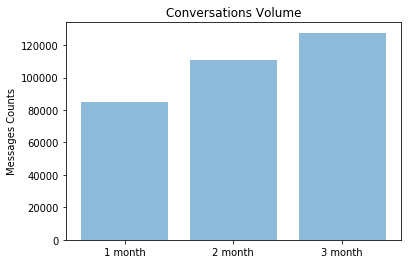

In [688]:
objects = ('1 month', '2 month', '3 month')
y_pos = np.arange(len(objects))
performance = [len(ms1), len(ms2), len(ms3)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Messages Counts')
plt.title('Conversations Volume')

plt.show()

In [274]:
# ms1.to_csv('/Users/wanghan/Projects/MacMic/data/ms1.csv', index=False)
# ms2.to_csv('/Users/wanghan/Projects/MacMic/data/ms2.csv', index=False)
# ms3.to_csv('/Users/wanghan/Projects/MacMic/data/ms3.csv', index=False)

In [400]:
ms1.head()

,UserID,StylistID,ChatTime,Sender,ChatBody,r1,r2,r3,r4,r5,ordertimes,y,Purchased
0,228.0,2495.0,2019-03-03 21:16:00,stylist,Good Morning Molly! It's Lori from Mac & Mia ...,2016-09-05,2018-06-06,2018-08-23,2019-03-03,2019-03-12,50,1,4
1,228.0,2495.0,2019-03-08 08:39:00,stylist,Good Morning Molly!\r\n I see that Birdie's b...,2016-09-05,2018-06-06,2018-08-23,2019-03-03,2019-03-12,50,1,4
2,228.0,2495.0,2019-03-09 16:51:00,customer,"Hi Lori, Thanks so much! Birdie's box was a...",2016-09-05,2018-06-06,2018-08-23,2019-03-03,2019-03-12,50,1,4
3,228.0,2495.0,2019-03-11 06:12:00,stylist,Good Morning Molly!\r\n Hope you and the kids...,2016-09-05,2018-06-06,2018-08-23,2019-03-03,2019-03-12,50,1,4
4,228.0,2495.0,2019-03-11 09:15:00,customer,"Hi Lori! So for Whit's, I don't think I've to...",2016-09-05,2018-06-06,2018-08-23,2019-03-03,2019-03-12,50,1,4


In [425]:
'''
Add target variable: y[0,1,2,3]
0: repurchase not happen
1: repurchase happen in the first month
2: repurchase happen in the second month
3: repurchase happen in the third month
4: repurchase happen after three month
'''

def repurchase_time(df_message, i):
    r1 = df_message['r1']
    r2 = df_message['r2']
    r3 = df_message['r3']
    r4 = df_message['r4']
    r5 = df_message['r5']
    purchase_time = df_message['ordertimes'][i]
    if purchase_time < 10:
        return 0
    elif df_message['ordertimes'][i] == 20:
        return (r2[i] - r1[i]).days
    elif df_message['ordertimes'][i] == 30:
        return (r3[i] - r2[i]).days
    elif df_message['ordertimes'][i] == 40:
        return (r4[i] - r3[i]).days
    else:
        return (r5[i] - r4[i]).days

    
def repurchase_label(df_message):
    days_re = []
    for i in range(len(df_message)):
        days_re.append(repurchase_time(df_message, i))
    return days_re


def classify_y(repurchase_days):
    y = []
    for j in range(len(repurchase_days)):
        if repurchase_days[j] == 0:
            y.append(0)
        elif repurchase_days[j] <= 30:
            y.append(1)
        elif repurchase_days[j] <= 60:
            y.append(2)
        elif repurchase_days[j] <= 90:
            y.append(3)
        else:
            y.append(4)
    return  y        

In [428]:
# Add label
ms1['repurchase_days'] = repurchase_label(ms1)
ms1['y'] = classify_y(ms1['repurchase_days'])

ms2['repurchase_days'] = repurchase_label(ms2)
ms2['y'] = classify_y(ms2['repurchase_days'])

ms3['repurchase_days'] = repurchase_label(ms3)
ms3['y'] = classify_y(ms3['repurchase_days'])

In [316]:
'''
Caculate have many purchase happen before each message
'''
def classify_message(df_message):
    purchased = []
    for i in range(len(df_message)):
        if df_message['ordertimes'][i] in [1,20]:
            purchased.append(1)
        elif df_message['ordertimes'][i] in [2,30]:
            purchased.append(2)
        elif df_message['ordertimes'][i] in [3,40]:
            purchased.append(3)
        else:
            purchased.append(4)
    return purchased

In [317]:
ms1['Purchased'] = classify_message(ms1)
ms2['Purchased'] = classify_message(ms2)
ms3['Purchased'] = classify_message(ms3)

In [465]:
'''
Clean up text
'''
from nltk.stem.porter import *
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 2:
            result.append(lemmatize_stemming(token))
    return result

In [466]:
ms1['text_fun']= ms1['ChatBody'].map(preprocess)
ms2['text_fun']= ms2['ChatBody'].map(preprocess)
ms3['text_fun']= ms3['ChatBody'].map(preprocess)

In [467]:
m1_v1 = ms1[['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody',
             'text_fun', 'Purchased', 'repurchase_days', 'y']]
m2_v1 = ms2[['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody',
             'text_fun', 'Purchased', 'repurchase_days', 'y']]
m3_v1 = ms3[['UserID', 'StylistID', 'ChatTime', 'Sender', 'ChatBody',
             'text_fun', 'Purchased', 'repurchase_days', 'y']]



In [468]:
m1_v1.head()

,UserID,StylistID,ChatTime,Sender,ChatBody,text_fun,Purchased,repurchase_days,y
0,228.0,2495.0,2019-03-03 21:16:00,stylist,Good Morning Molly! It's Lori from Mac & Mia ...,"[good, morn, molli, lori, mac, mia, work, kid,...",4,9,1
1,228.0,2495.0,2019-03-08 08:39:00,stylist,Good Morning Molly!\r\n I see that Birdie's b...,"[good, morn, molli, birdi, box, deliv, whit, b...",4,9,1
2,228.0,2495.0,2019-03-09 16:51:00,customer,"Hi Lori, Thanks so much! Birdie's box was a...","[hi, lori, thank, birdi, box, huge, hit, keep,...",4,9,1
3,228.0,2495.0,2019-03-11 06:12:00,stylist,Good Morning Molly!\r\n Hope you and the kids...,"[good, morn, molli, hope, kid, enjoy, great, w...",4,9,1
4,228.0,2495.0,2019-03-11 09:15:00,customer,"Hi Lori! So for Whit's, I don't think I've to...","[hi, lori, whit, think, ve, tell, wouldn, know...",4,9,1


In [441]:
# m1_v1.groupby(['UserID', 'Purchased', 'Sender'])['text_fun'].apply(list)

In [540]:
'''
Group message into different conversation.
Seperate conversation by sender.
'''
def message_preparation(df):
    usid = []
    styid = []
    puchtime = []
    us_doc = []
    us_m_count = []
    sty_doc = []
    sty_m_count = []
    repurchase_days = []
    y = []
    for i in df['UserID'].unique():
        temp_us = df[df['UserID'] == i]
        for j in temp_us['Purchased'].unique():
            temp_puch = temp_us[temp_us['Purchased'] == j]
            temp_puch.reset_index(drop = True, inplace = True)
            usid.append(i)
            styid.append(temp_puch['StylistID'][0])
            puchtime.append(j)
            repurchase_days.append(temp_puch['repurchase_days'][0])
            y.append(temp_puch['y'][0])
            if 'customer' in temp_puch['Sender'].unique():
                temp_send_us = temp_puch[temp_puch['Sender'] == 'customer']
                temp_send_us.reset_index(drop = True, inplace = True)
                us_m_count.append(len(temp_send_us))
                us_m = temp_send_us['text_fun'][0]
                if len(temp_send_us) == 1:
                    us_doc.append(us_m)
                elif len(temp_send_us) == 2:
                    us_doc.append(us_m + temp_send_us['text_fun'][1])
                else:
                    for p in range(1,len(temp_send_us)):
                        us_m = us_m + temp_send_us['text_fun'][p]
                    us_doc.append(us_m)
            else:
                us_doc.append(0)
                us_m_count.append(0)
            if 'stylist' in temp_puch['Sender'].unique():
                temp_send_sty = temp_puch[temp_puch['Sender'] == 'stylist']
                temp_send_sty.reset_index(drop = True, inplace = True)
                sty_m_count.append(len(temp_send_sty))
                sty_m = temp_send_sty['text_fun'][0]
                if len(temp_send_sty) == 1:
                    sty_doc.append(sty_m)
                elif len(temp_send_sty) == 2:
                    sty_doc.append(sty_m + temp_send_sty['text_fun'][1])
                else:
                    for q in range(1,len(temp_send_sty)):
                        sty_m = sty_m + temp_send_sty['text_fun'][q]
                    sty_doc.append(sty_m)   
            else:
                sty_doc.append(0)
                sty_m_count.append(0)
    df_pre = pd.DataFrame({'UserID': usid,
                           'StylistID': styid,
                           'Purchased': puchtime,
                           'User_count': us_m_count,
                           'Stylist_count': sty_m_count,
                           'User_doc': us_doc,
                           'Stylist_doc': sty_doc,
                           'Repurchase_days': repurchase_days,
                           'Repurchase': y})
    return df_pre
    

In [541]:
%time m1 = message_preparation(m1_v1)
%time m2 = message_preparation(m2_v1)
%time m3 = message_preparation(m3_v1)

CPU times: user 31.6 s, sys: 104 ms, total: 31.7 s
Wall time: 31.8 s
CPU times: user 34.4 s, sys: 94.2 ms, total: 34.5 s
Wall time: 34.7 s
CPU times: user 35.9 s, sys: 105 ms, total: 36 s
Wall time: 36.2 s


In [544]:
# m1.to_csv('/Users/wanghan/Projects/MacMic/data/messages_1.csv', index=False)
# m2.to_csv('/Users/wanghan/Projects/MacMic/data/messages_2.csv', index=False)
# m3.to_csv('/Users/wanghan/Projects/MacMic/data/messages_3.csv', index=False)

In [719]:
a1 = (m1[m1['User_count'] != 0]['User_count'].mean())
a2 = (m1[m1['Stylist_count'] != 0]['Stylist_count'].mean())
b1 = (m2[m2['User_count'] != 0]['User_count'].mean())
b2 = (m2[m2['Stylist_count'] != 0]['Stylist_count'].mean())
c1 = (m3[m3['User_count'] != 0]['User_count'].mean())
c2 = (m3[m3['Stylist_count'] != 0]['Stylist_count'].mean())

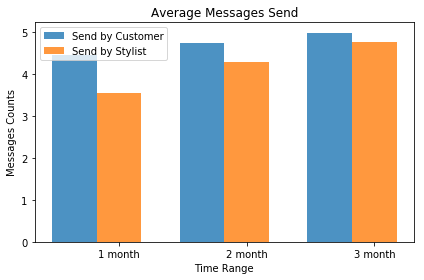

In [720]:
# data to plot
n_groups = 3
means_frank = (a1, b1, c1)
means_guido = (a2, b2, c2)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
#color='b',
label='Send by Customer')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
#color='g',
label='Send by Stylist')

plt.xlabel('Time Range')
plt.ylabel('Messages Counts')
plt.title('Average Messages Send')
plt.xticks(index + bar_width, ('1 month', '2 month', '3 month'))
plt.legend()

plt.tight_layout()
plt.show()

In [655]:
bb = m3[['Purchased','User_count', 'Stylist_count', 'Repurchase_days']]
bb.columns = ['Purchased', 'Sender_User', 'Sender_Stylist', 'Repurchase_days']
corr = bb.corr()
corr.style.background_gradient(cmap='coolwarm')

,Purchased,Sender_User,Sender_Stylist,Repurchase_days
Purchased,1,-0.0260229,-0.0664001,0.0894351
Sender_User,-0.0260229,1,0.869961,-0.080908
Sender_Stylist,-0.0664001,0.869961,1,-0.112263
Repurchase_days,0.0894351,-0.080908,-0.112263,1


In [554]:
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim 

In [565]:
udoc = m1['User_doc']
u = udoc[udoc != 0]
sdoc = m1['Stylist_doc']
s = sdoc[sdoc != 0]
uix = u.index
six = s.index

In [568]:
dictionary_u = gensim.corpora.Dictionary(u)
dictionary_s = gensim.corpora.Dictionary(s)
dictionary_u.filter_extremes(no_below=15, no_above=0.8)
dictionary_s.filter_extremes(no_below=15, no_above=0.8)

In [569]:
bow_corpus_u = [dictionary_u.doc2bow(doc) for doc in u]
bow_corpus_s = [dictionary_s.doc2bow(doc) for doc in s]

In [651]:
tfidf_u = models.TfidfModel(bow_corpus_u)
corpus_tfidf_u = tfidf_u[bow_corpus_u]
tfidf_s = models.TfidfModel(bow_corpus_s)
corpus_tfidf_s = tfidf_u[bow_corpus_s]

In [580]:
from gensim.models import CoherenceModel
def compute_coherence_values(processed_docs, corpus_tfidf, dictionary, limit = 20, start = 2, step = 1):
    """
    Compute c_v coherence for various number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, random_state=101,passes=2, workers=4)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_values.append(coherence_score)

    return model_list, coherence_values

In [591]:
# Using LDA_TF_IDF model to classify all messages
def LDA_TF_IDF_apply(i, best_model):
    result = sorted(best_model[bow_corpus_u[i]], key=lambda tup: -1*tup[1])
    if len(result)>0:
        index = result[0][0]
    else:
        index = 'other'
    return index

In [652]:
limit=20; start=2; step=1;
%time model_list_u, coherence_values_u = compute_coherence_values(u, corpus_tfidf_u, dictionary_u)
%time model_list_s, coherence_values_s = compute_coherence_values(s, corpus_tfidf_s, dictionary_s)

CPU times: user 1min 35s, sys: 8.57 s, total: 1min 44s
Wall time: 2min 9s
CPU times: user 4min 3s, sys: 11.1 s, total: 4min 14s
Wall time: 5min 26s


In [592]:
bestmodel = model_list[coherence_values.index(max(coherence_values))]
topic = []
for i in range(len(u)):
    topic.append(LDA_TF_IDF_apply(i, bestmodel))

In [620]:
y1 = m1.loc[uix]['Repurchase']

In [621]:
aa = pd.DataFrame({'topic': topic, 'y': y1})

In [727]:
m1.head()

,UserID,StylistID,Purchased,User_count,Stylist_count,User_doc,Stylist_doc,Repurchase_days,Repurchase
0,228.0,2495.0,4,3,4,"[hi, lori, thank, birdi, box, huge, hit, keep,...","[good, morn, molli, lori, mac, mia, work, kid,...",9,1
1,282.0,284887.0,4,2,3,"[hi, ali, websit, let, check, rocco, tri, yest...","[hi, traci, chanc, look, box, thank, ali, hi, ...",0,0
2,282.0,284887.0,2,5,4,"[morn, get, pop, open, box, late, yesterday, l...","[hi, traci, check, box, think, abl, look, week...",35,2
3,282.0,284887.0,3,3,3,"[like, unicorn, subtl, unicorn, hi, think, nee...","[pack, box, luciana, unicorn, thank, ali, hey,...",25,1
4,403.0,3197.0,2,3,3,"[thank, kara, size, rang, size, depend, fit, b...","[hi, andrea, kara, stylist, mac, mia, new, wor...",0,0


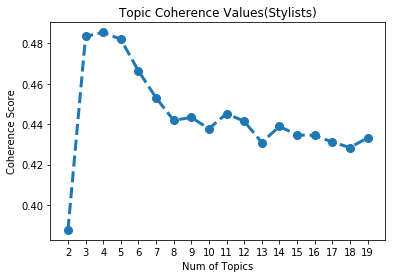

In [723]:
x = range(start, limit, step)
plt.plot(x, coherence_values_s,linestyle='dashed', linewidth = 3, marker='o', markersize=8)
plt.xlim(1,20)
plt.xticks(x, x)
plt.xlabel("Num of Topics")
plt.ylabel("Coherence Score")
plt.title(("Topic Coherence Values(Stylists)"), loc='center')
plt.show()

In [649]:
from pprint import pprint
pprint(bestmodel.print_topics())

[(0,
  '0.016*"ok" + 0.011*"awesom" + 0.011*"thank" + 0.009*"box" + 0.008*"love" + '
  '0.008*"send" + 0.007*"good" + 0.007*"great" + 0.006*"excit" + '
  '0.006*"think"'),
 (1,
  '0.008*"ye" + 0.008*"box" + 0.008*"love" + 0.008*"size" + 0.008*"like" + '
  '0.007*"thank" + 0.007*"think" + 0.007*"great" + 0.007*"cloth" + '
  '0.007*"send"'),
 (2,
  '0.009*"love" + 0.009*"box" + 0.009*"month" + 0.008*"thank" + 0.007*"like" + '
  '0.006*"cute" + 0.006*"hi" + 0.006*"send" + 0.006*"great" + 0.006*"size"'),
 (3,
  '0.014*"ye" + 0.011*"thank" + 0.010*"hi" + 0.010*"wait" + 0.009*"box" + '
  '0.008*"okay" + 0.008*"check" + 0.008*"look" + 0.008*"excit" + '
  '0.007*"forward"'),
 (4,
  '0.040*"thank" + 0.014*"great" + 0.009*"hi" + 0.008*"box" + 0.008*"love" + '
  '0.007*"good" + 0.007*"month" + 0.007*"sure" + 0.007*"cloth" + 0.007*"get"')]


In [724]:
pyLDAvis.enable_notebook()
vis_user = pyLDAvis.gensim.prepare(model_list_s[2], corpus_tfidf_s, dictionary_s)
pyLDAvis.show(vis_user)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [08/Jul/2019 17:52:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Jul/2019 17:52:54] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Jul/2019 17:52:54] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Jul/2019 17:52:54] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


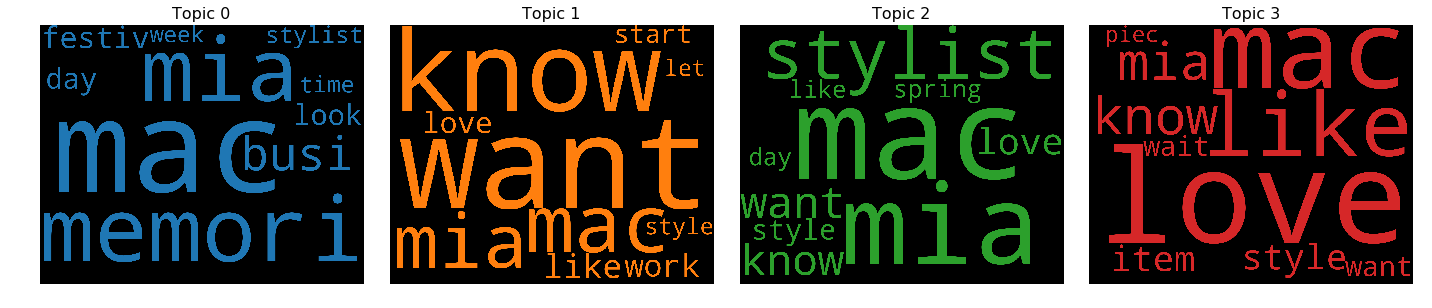

In [726]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  width=2500,
                  height=2000,
                  #max_words=30,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model_list_s[2].show_topics(formatted=False)

fig, axes = plt.subplots(1, 4, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1000)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()